# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Achievement 6'
df_clean= pd.read_csv(os.path.join(path, 'Data','Cleanest_data.csv'), index_col= False)

# Data Cleaning

In [6]:
df_clean = df_clean.drop('Unnamed: 0', axis=1)
df_clean.head()

,Company \n(Maker-if known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Quality
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Missing,Sao Tome,Above Average
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Missing,Togo,Below Average
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Missing,Togo,Average
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Missing,Togo,Average
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Missing,Peru,Average


In [7]:
df_clean.describe()

,REF,Review_Date,Cocoa_Percent,Rating
count,1934.000000,1934.000000,1934.000000,1934.00000
mean,1028.054292,2012.278180,71.719752,3.19545
std,555.505999,2.949334,6.367643,0.47933
min,5.000000,2006.000000,42.000000,1.00000
25%,565.000000,2010.000000,70.000000,3.00000
50%,1059.000000,2013.000000,70.000000,3.25000
75%,1494.000000,2015.000000,75.000000,3.50000
max,1952.000000,2017.000000,100.000000,5.00000


## Looking into data
unlike in the previous exercise I did check these values in the original cleaning as the above describes there aren't really outliers and having already graphed this data pretty sure it doesn't need anymore cleaning. 

# Data exploration

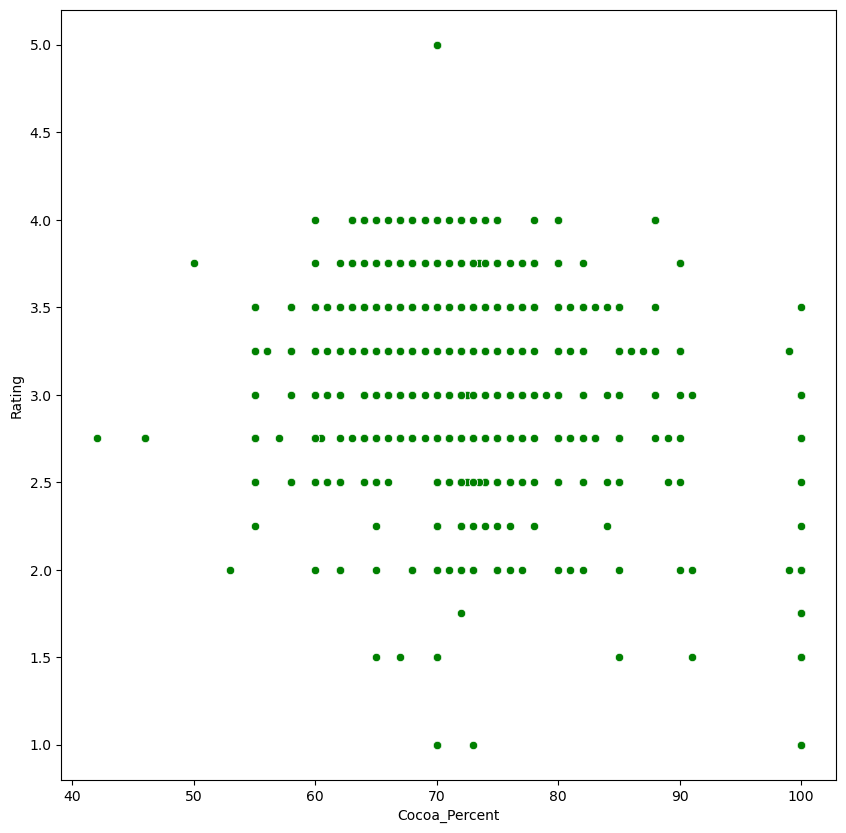

In [18]:
# cocoa percent versus rating
plt.figure(figsize=(10,10))
sctplt = sns.scatterplot(x='Cocoa_Percent', y='Rating', data=df_clean, color = 'green')
plt.show()

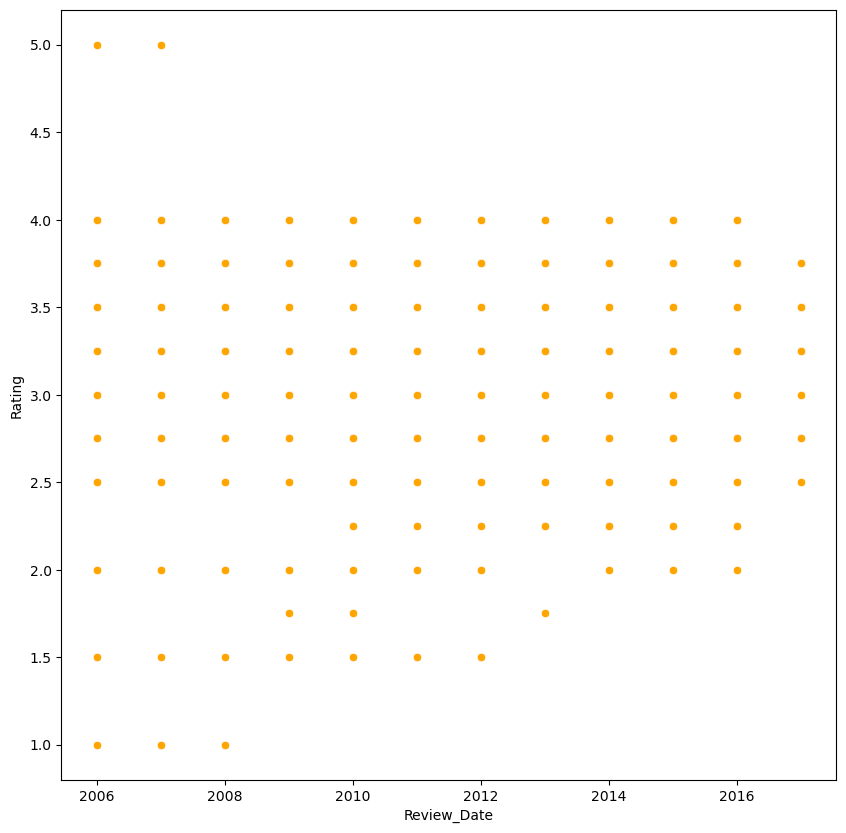

In [16]:
# Rating versus review date 
plt.figure(figsize=(10,10))
sctplt = sns.scatterplot(x='Review_Date', y='Rating', data=df_clean, color = 'orange')
plt.show()

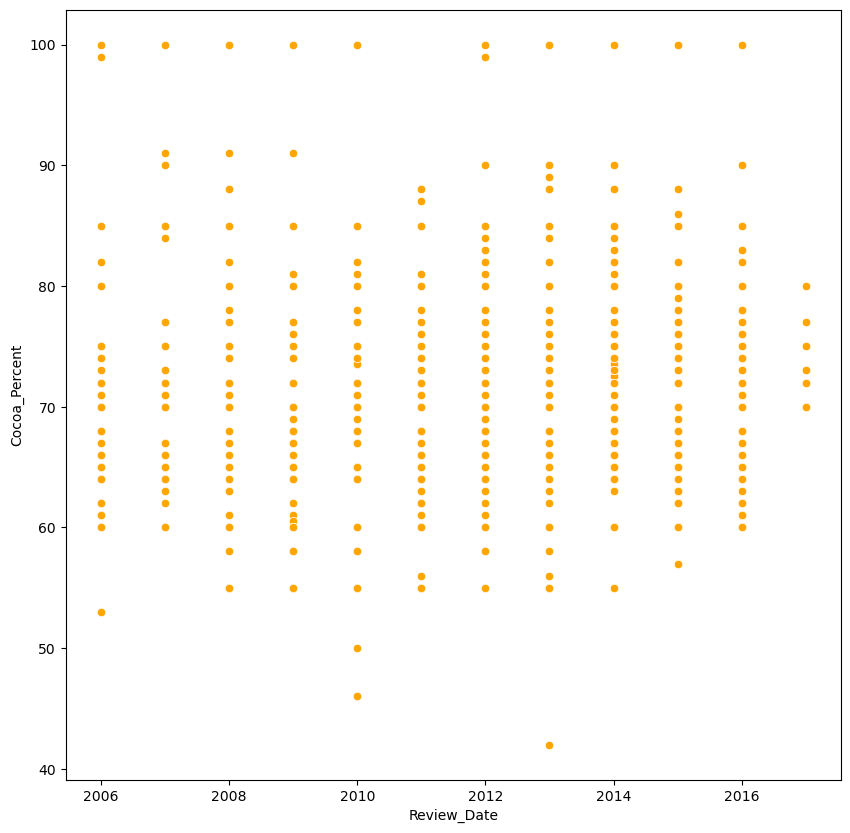

In [15]:
# Cocoa percent versus review date
plt.figure(figsize=(10,10))
sctplt = sns.scatterplot(x='Review_Date', y='Cocoa_Percent', data=df_clean, color = 'orange')
plt.show()

## Hypothesis
This is where this data set is a little less interesting. There isn't any strong relationships in the continous variables, so the hypothesis is going to be a little weak.

Hypothesis: As the cocoa percentage increases the overall rating decreases.

# Regression 

In [19]:
# converting to numpy arrary
X = df_clean['Cocoa_Percent'].values.reshape(-1,1)
y = df_clean['Rating'].values.reshape(-1,1)

In [20]:
# Creating training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
#preparing the regression object and prediction 
regression = LinearRegression()
regression.fit(X_train, y_train)
y_predicted = regression.predict(X_test)

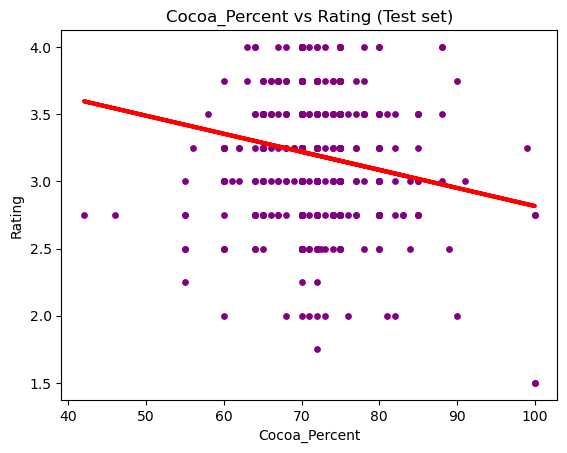

In [22]:
# plotting
plot_test = plt
plot_test.scatter(X_test, y_test, color='purple', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa_Percent vs Rating (Test set)')
plot_test.xlabel('Cocoa_Percent')
plot_test.ylabel('Rating')
plot_test.show()

In [23]:
# checking error
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01343972]]
Mean squared error:  0.21087155502131985
R2 score:  -0.0025688584207557152


In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.75,3.219406
1,2.50,2.964051
2,3.25,3.259725
3,2.75,3.044689
4,2.75,3.192526
5,3.50,3.219406
6,3.50,3.286604
7,3.00,3.152207
8,4.00,3.152207
9,3.00,3.192526


In [31]:
# A quick look at the difference between the predicted and the actual using averages
print('Actual Average:', data['Actual'].mean(),'\n', 'Predicted Average:', data['Predicted'].mean(),'\n', 'Percent Difference: ', (abs((data['Actual'].mean())-(data['Predicted'].mean()))/(data['Actual'].mean()))* 100)

Actual Average: 3.1953528399311533 
 Predicted Average: 3.1981590719161423 
 Percent Difference:  0.08782228835328075


## Regression Insights
With a very small MSE and R2 the predictive analysis seems to have modeled the data very well. Checking further the averages of the predicted and the actual ratings are very close to each other. Proving the overall accuracy of the model.

The weak slopes present in all the scatterplots helps indicate a lack of bias in the data set. To elaborate, weak correlation on rating for review date and cocoa percentage. Means that there isn't much of a temporal bias in the data and there isn't measurement bias in the form of a preference for or agianist cocoa percentage. There maybe some sample bias in the form of a lack of data in the lower cocoa percentage range. Dark chocolate is defined as having at least 43% cocoa but there is not alot of data around the 50% which would classify. 